# 第11章: グラフの入出力操作

## 学習目標
- 様々なファイル形式でグラフを保存・読み込みできる
- 外部データからグラフを構築できる
- 他のライブラリとの連携ができる

## 難易度: 中級

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import japanize_matplotlib
import json
import os
%matplotlib inline

---
## 11.1 エッジリスト形式

In [2]:
# サンプルグラフの作成
G = nx.Graph()
G.add_weighted_edges_from([
    ('A', 'B', 1.5), ('A', 'C', 2.0), ('B', 'C', 0.5),
    ('B', 'D', 3.0), ('C', 'D', 1.0)
])

In [3]:
# エッジリストとして保存
nx.write_edgelist(G, 'sample_graph.edgelist')
print("エッジリストとして保存しました")

# ファイル内容を確認
with open('sample_graph.edgelist', 'r') as f:
    print(f.read())

エッジリストとして保存しました
A B {'weight': 1.5}
A C {'weight': 2.0}
B C {'weight': 0.5}
B D {'weight': 3.0}
C D {'weight': 1.0}



In [4]:
# エッジリストから読み込み
G_loaded = nx.read_edgelist('sample_graph.edgelist')
print(f"読み込んだグラフ: {G_loaded.number_of_nodes()}ノード, {G_loaded.number_of_edges()}エッジ")

読み込んだグラフ: 4ノード, 5エッジ


In [5]:
# 重み付きエッジリストの保存・読み込み
nx.write_weighted_edgelist(G, 'sample_weighted.edgelist')

G_weighted = nx.read_weighted_edgelist('sample_weighted.edgelist')
print("\n重み付きエッジ:")
for u, v, w in G_weighted.edges(data='weight'):
    print(f"  {u} - {v}: {w}")


重み付きエッジ:
  A - B: 1.5
  A - C: 2.0
  B - C: 0.5
  B - D: 3.0
  C - D: 1.0


---
## 11.2 隣接リスト形式

In [6]:
# 隣接リストとして保存
nx.write_adjlist(G, 'sample_graph.adjlist')

with open('sample_graph.adjlist', 'r') as f:
    print("隣接リスト形式:")
    print(f.read())

隣接リスト形式:
#/home/katzkawai/networkx-tutorials/.venv/lib/python3.11/site-packages/ipykernel_launcher.py -f /tmp/tmp03acszty.json --HistoryManager.hist_file=:memory:
# GMT Sat Dec 13 20:36:39 2025
# 
A B C
B C D
C D
D



In [7]:
# 隣接リストから読み込み
G_adj = nx.read_adjlist('sample_graph.adjlist')
print(f"読み込んだグラフ: {list(G_adj.nodes())}")

読み込んだグラフ: ['A', 'B', 'C', 'D']


---
## 11.3 GML形式

Graph Modeling Language - 属性も保存可能

In [8]:
# ノード・エッジ属性付きグラフ
G = nx.Graph(name="Sample Network")
G.add_node(1, label="Node A", color="red")
G.add_node(2, label="Node B", color="blue")
G.add_node(3, label="Node C", color="green")
G.add_edge(1, 2, weight=1.5, type="strong")
G.add_edge(2, 3, weight=0.5, type="weak")
G.add_edge(1, 3, weight=2.0, type="medium")

In [9]:
# GML形式で保存
nx.write_gml(G, 'sample_graph.gml')

with open('sample_graph.gml', 'r') as f:
    print("GML形式:")
    print(f.read())

GML形式:
graph [
  name "Sample Network"
  node [
    id 0
    label "1"
    color "red"
  ]
  node [
    id 1
    label "2"
    color "blue"
  ]
  node [
    id 2
    label "3"
    color "green"
  ]
  edge [
    source 0
    target 1
    weight 1.5
    type "strong"
  ]
  edge [
    source 0
    target 2
    weight 2.0
    type "medium"
  ]
  edge [
    source 1
    target 2
    weight 0.5
    type "weak"
  ]
]



In [10]:
# GMLから読み込み（属性も復元）
G_gml = nx.read_gml('sample_graph.gml')

print("読み込んだグラフの属性:")
for node, data in G_gml.nodes(data=True):
    print(f"  ノード {node}: {data}")

読み込んだグラフの属性:
  ノード 1: {'color': 'red'}
  ノード 2: {'color': 'blue'}
  ノード 3: {'color': 'green'}


---
## 11.4 GraphML形式

XMLベースの標準形式

In [11]:
# GraphML形式で保存
nx.write_graphml(G, 'sample_graph.graphml')
print("GraphML形式で保存しました")

GraphML形式で保存しました


In [12]:
# GraphMLから読み込み
G_graphml = nx.read_graphml('sample_graph.graphml')
print(f"ノード: {list(G_graphml.nodes())}")
print(f"エッジ: {list(G_graphml.edges())}")

ノード: ['1', '2', '3']
エッジ: [('1', '2'), ('1', '3'), ('2', '3')]


---
## 11.5 JSON形式

In [13]:
# JSON形式（node-link形式）
from networkx.readwrite import json_graph

data = json_graph.node_link_data(G)

# JSONファイルとして保存
with open('sample_graph.json', 'w') as f:
    json.dump(data, f, indent=2)

print("JSON形式:")
print(json.dumps(data, indent=2))

JSON形式:
{
  "directed": false,
  "multigraph": false,
  "graph": {
    "name": "Sample Network"
  },
  "nodes": [
    {
      "label": "Node A",
      "color": "red",
      "id": 1
    },
    {
      "label": "Node B",
      "color": "blue",
      "id": 2
    },
    {
      "label": "Node C",
      "color": "green",
      "id": 3
    }
  ],
  "edges": [
    {
      "weight": 1.5,
      "type": "strong",
      "source": 1,
      "target": 2
    },
    {
      "weight": 2.0,
      "type": "medium",
      "source": 1,
      "target": 3
    },
    {
      "weight": 0.5,
      "type": "weak",
      "source": 2,
      "target": 3
    }
  ]
}


In [14]:
# JSONから読み込み
with open('sample_graph.json', 'r') as f:
    data_loaded = json.load(f)

G_json = json_graph.node_link_graph(data_loaded)
print(f"読み込んだグラフ: {G_json.number_of_nodes()}ノード")

読み込んだグラフ: 3ノード


---
## 11.6 外部データからグラフを構築

In [15]:
# Pandasデータフレームから
import pandas as pd

# エッジデータ
df_edges = pd.DataFrame({
    'source': ['A', 'A', 'B', 'C', 'D'],
    'target': ['B', 'C', 'C', 'D', 'E'],
    'weight': [1.0, 2.0, 1.5, 3.0, 2.5]
})

print("エッジデータフレーム:")
print(df_edges)

エッジデータフレーム:
  source target  weight
0      A      B     1.0
1      A      C     2.0
2      B      C     1.5
3      C      D     3.0
4      D      E     2.5


In [16]:
# DataFrameからグラフを作成
G_from_df = nx.from_pandas_edgelist(df_edges, 'source', 'target', ['weight'])

print(f"\nグラフ: {G_from_df.number_of_nodes()}ノード, {G_from_df.number_of_edges()}エッジ")
print("エッジと重み:")
for u, v, w in G_from_df.edges(data='weight'):
    print(f"  {u} - {v}: {w}")


グラフ: 5ノード, 5エッジ
エッジと重み:
  A - B: 1.0
  A - C: 2.0
  B - C: 1.5
  C - D: 3.0
  D - E: 2.5


In [17]:
# グラフをDataFrameに変換
df_from_G = nx.to_pandas_edgelist(G_from_df)
print("\nDataFrameに戻す:")
print(df_from_G)


DataFrameに戻す:
  source target  weight
0      A      B     1.0
1      A      C     2.0
2      B      C     1.5
3      C      D     3.0
4      D      E     2.5


---
## 11.7 NumPy/SciPyとの連携

In [18]:
import numpy as np

G = nx.complete_graph(4)

# 隣接行列
adj_matrix = nx.to_numpy_array(G)
print("隣接行列:")
print(adj_matrix)

隣接行列:
[[0. 1. 1. 1.]
 [1. 0. 1. 1.]
 [1. 1. 0. 1.]
 [1. 1. 1. 0.]]


In [19]:
# NumPy配列からグラフを作成
custom_matrix = np.array([
    [0, 1, 1, 0],
    [1, 0, 1, 1],
    [1, 1, 0, 1],
    [0, 1, 1, 0]
])

G_from_numpy = nx.from_numpy_array(custom_matrix)
print(f"\nNumPyからグラフ: {list(G_from_numpy.edges())}")


NumPyからグラフ: [(0, 1), (0, 2), (1, 2), (1, 3), (2, 3)]


In [20]:
# SciPyスパース行列
from scipy import sparse

sparse_matrix = nx.to_scipy_sparse_array(G)
print(f"スパース行列の形状: {sparse_matrix.shape}")
print(f"非ゼロ要素数: {sparse_matrix.nnz}")

スパース行列の形状: (4, 4)
非ゼロ要素数: 12


---
## 例題: CSVファイルからネットワーク構築

In [21]:
# サンプルCSVデータの作成
csv_data = """person1,person2,relationship,strength
Alice,Bob,friend,0.8
Alice,Charlie,colleague,0.5
Bob,Charlie,friend,0.9
Bob,Diana,family,1.0
Charlie,Eve,colleague,0.4
Diana,Eve,friend,0.7
"""

with open('relationships.csv', 'w') as f:
    f.write(csv_data)

print("CSVファイルを作成しました")

CSVファイルを作成しました


In [22]:
# CSVからグラフを構築
df = pd.read_csv('relationships.csv')
print("CSVデータ:")
print(df)

CSVデータ:
   person1  person2 relationship  strength
0    Alice      Bob       friend       0.8
1    Alice  Charlie    colleague       0.5
2      Bob  Charlie       friend       0.9
3      Bob    Diana       family       1.0
4  Charlie      Eve    colleague       0.4
5    Diana      Eve       friend       0.7


/home/katzkawai/networkx-tutorials/.venv/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 12363 (\N{HIRAGANA LETTER KA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/katzkawai/networkx-tutorials/.venv/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 12425 (\N{HIRAGANA LETTER RA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/katzkawai/networkx-tutorials/.venv/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 27083 (\N{CJK UNIFIED IDEOGRAPH-69CB}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/katzkawai/networkx-tutorials/.venv/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 31689 (\N{CJK UNIFIED IDEOGRAPH-7BC9}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/katzkawai/networkx-tutorials/.venv/lib/python3.11/site-packages/IP

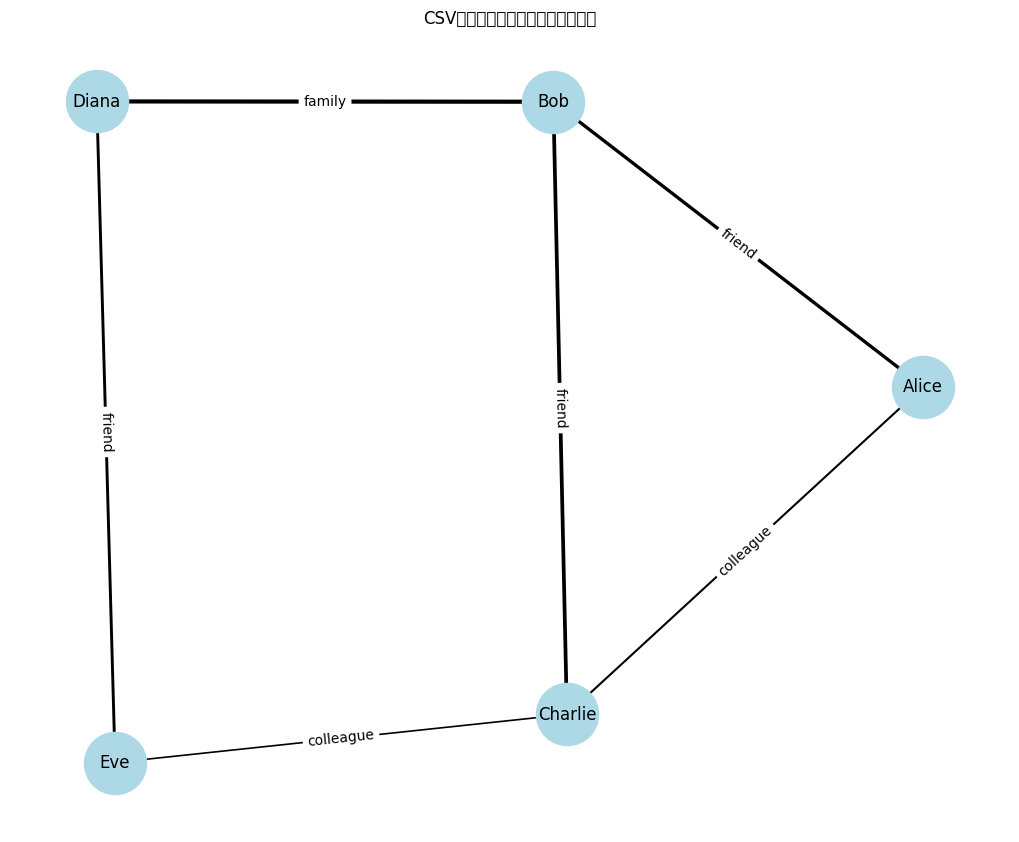

In [23]:
# グラフ作成
G = nx.from_pandas_edgelist(df, 'person1', 'person2', ['relationship', 'strength'])

# 可視化
plt.figure(figsize=(10, 8))
pos = nx.spring_layout(G, seed=42)

# エッジの太さを強度に比例
widths = [G[u][v]['strength'] * 3 for u, v in G.edges()]

nx.draw(G, pos, with_labels=True, node_color='lightblue',
        node_size=2000, font_size=12, width=widths)

# エッジラベル（関係性）
edge_labels = {(u, v): G[u][v]['relationship'] for u, v in G.edges()}
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=10)

plt.title("CSVから構築した関係ネットワーク")
plt.show()

---
## 練習問題

### 練習問題1: グラフの保存と復元

空手クラブグラフをJSON形式で保存し、読み込み後に元のグラフと同じ統計情報（ノード数、エッジ数、平均次数）であることを確認してください。

In [24]:
# ここにコードを記述してください



<details>
<summary>解答を見る</summary>

```python
# 元のグラフ
G_original = nx.karate_club_graph()

# JSON保存
data = json_graph.node_link_data(G_original)
with open('karate.json', 'w') as f:
    json.dump(data, f)

# JSON読み込み
with open('karate.json', 'r') as f:
    data_loaded = json.load(f)
G_loaded = json_graph.node_link_graph(data_loaded)

# 比較
def graph_stats(G):
    return {
        'nodes': G.number_of_nodes(),
        'edges': G.number_of_edges(),
        'avg_degree': sum(dict(G.degree()).values()) / G.number_of_nodes()
    }

print("=== グラフ統計の比較 ===")
print(f"元のグラフ: {graph_stats(G_original)}")
print(f"読込グラフ: {graph_stats(G_loaded)}")
print(f"\n一致: {graph_stats(G_original) == graph_stats(G_loaded)}")
```
</details>

In [25]:
# クリーンアップ
import os
for f in ['sample_graph.edgelist', 'sample_weighted.edgelist', 'sample_graph.adjlist',
          'sample_graph.gml', 'sample_graph.graphml', 'sample_graph.json', 'relationships.csv']:
    if os.path.exists(f):
        os.remove(f)

---
## 11.8 章のまとめ

この章では以下を学びました：

1. **エッジリスト形式**: シンプルなテキスト形式
2. **GML形式**: 属性付きグラフの保存
3. **GraphML形式**: XML標準形式
4. **JSON形式**: Web連携に便利
5. **Pandas連携**: DataFrameとの相互変換
6. **NumPy/SciPy連携**: 行列との相互変換

### 次章の予告
次章では、高度なトピックについて学びます。